In [22]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import plotly.graph_objects as go
import matplotlib.pyplot as plt
from matplotlib.pyplot import plot
import tempfile
from pathlib import Path

from visualizer.csa import CMA_CSA
from visualizer.csa_mod0 import CMA_CSA_MOD0
from visualizer.csa_mod1 import CMA_CSA_MOD1
from visualizer.csa_mod2 import CMA_CSA_MOD2
from visualizer.csa_mod3 import CMA_CSA_MOD3
from visualizer.csa_mod4 import CMA_CSA_MOD4
tmp_dir = Path(tempfile.gettempdir())

In [6]:
def get_better_than_percentage(score, score_list):
    score_list.sort() # asc
    print("---")
    print(score_list)
    print(score)
    index = easy_search(score, score_list)
    print((index / len(score_list)) * 100)
    return (index / len(score_list)) * 100

def easy_search(score, score_list):
    for i in range(0, len(score_list)):
        if not score > score_list[i]:
            return i
    return len(score_list)

In [7]:
from collections import namedtuple
Func = namedtuple('Func', ('expression', 'solution'))
quadratic1 = Func(lambda x1, x2: (x1 - 3) ** 2 + (x2 + 2) ** 2, (3, -2))


In [8]:
def main():
    optimizer = CMA_CSA(mean=np.array([-1000.0, 280.0]), sigma=1.3, population_size = 100)

    expert_better_than_percentages = []
    expert_scores = []
    expert_positions_with_score = []
    sigmas = []
    population_positions_with_score = {}
    iterations = 0
    while True:
        print(f"Iterations: {iterations}")
        population = []
        population_scores = []
        population_positions_with_score[iterations] = []
        for _ in range(optimizer.population_size):
            x = optimizer.ask()
            value = quadratic1.expression(x[0], x[1])
            population_scores.append(value)
            population.append((x, value))
            population_positions_with_score[iterations].append((x[0], x[1], value))

        expert_score = round(quadratic1.expression(optimizer._mean[0], optimizer._mean[1]), 5)
        expert_scores.append(expert_score)
        
        # calculate how large percent of pop was below expert's score
        expert_percentile = get_better_than_percentage(expert_score, population_scores)
        expert_better_than_percentages.append(expert_percentile)
        
        expert_positions_with_score.append((optimizer._mean[0], optimizer._mean[1], expert_score))
        
        sigma, = optimizer.tell(population, expert_percentile)
        sigmas.append(sigma)
        
        iterations += 1
        if optimizer.should_stop():
            break

    return expert_better_than_percentages, expert_scores, expert_positions_with_score, sigmas, iterations, population_positions_with_score



expert_better_than_percentages, expert_scores, expert_positions_with_score, sigmas, iterations, population_positions_with_score = main()
# qualities, mean_qualities, mean_3d_vector, sigmas, iterations = main()

print(f"Performed {iterations} iterations")

Iterations: 0
---
[1078068.6512859482, 1080066.8262493429, 1080236.0721375307, 1080310.7206877614, 1080687.742211436, 1080974.5691694715, 1081041.2247757562, 1081350.3604179942, 1081402.1290090943, 1081528.769228392, 1082166.9872691603, 1082245.123938249, 1082778.5966308876, 1082856.1615464916, 1083458.3099541694, 1083710.2783912213, 1083827.5777409293, 1083912.7340080617, 1083941.601082177, 1083960.5371278343, 1083975.270614666, 1084005.2177632726, 1084016.8756967708, 1084086.6203885998, 1084122.513968456, 1084125.4008680412, 1084144.9377037073, 1084305.983227427, 1084356.3932336308, 1084491.7888733798, 1084503.9692077513, 1084536.826354445, 1084574.7238638217, 1084601.5740248135, 1084610.7465147704, 1084713.2111214367, 1084766.7710495917, 1084788.0836494216, 1084858.4521246029, 1084872.8655596636, 1084944.7784151335, 1084950.4659495777, 1085034.7189518989, 1085066.4538396378, 1085139.3239804276, 1085187.2675968194, 1085207.2827144053, 1085243.7036243558, 1085364.576033054, 1085534.11

---
[7.774741143372916, 11.363736885753836, 16.922086342736144, 20.390838244304835, 23.1790278477655, 25.162020262292035, 26.36128532788274, 33.17317070410797, 52.876719422531906, 53.673186109306705, 56.138981791857596, 56.594465321414006, 66.88591794699097, 79.2183661028428, 86.14246198640066, 106.03453582704492, 106.52695771476306, 136.66060580937466, 146.3969433035176, 159.78833256689086, 175.87987358863603, 190.39558179901377, 226.43302741458464, 230.06082032833348, 230.36030583941613, 233.75104130769859, 238.017751049131, 258.28783492664303, 267.3819984716193, 277.9384308207147, 288.2271788983472, 290.54228355589123, 322.3203360120128, 330.5754016427848, 338.18371461805225, 338.77058113243936, 367.51595275302435, 371.29591211910963, 404.6032214758956, 427.5442905219312, 443.0662827156114, 450.8316367783224, 452.95386791514085, 470.3379728547484, 476.05179385885094, 488.3053812342353, 490.74056481824385, 498.87045504850903, 507.94994493778177, 529.7660276815415, 536.8134696229622, 

Iterations: 117
---
[0.0002284217529782366, 0.00034163564717509153, 0.00035572555277076464, 0.0003636504578926774, 0.00041789781652819816, 0.0005522704006555759, 0.0006152169249517932, 0.0006506981190548225, 0.0006782079620018419, 0.0006790893491229711, 0.0007279674705215058, 0.0007682183181850809, 0.0007783436489272313, 0.0009167955054600645, 0.0010764367074183028, 0.0011294787663166633, 0.0013462182314096297, 0.0013722667738232759, 0.0013926292314301878, 0.001521322015391089, 0.0015499780297761865, 0.0016886686673446383, 0.001885128385581612, 0.0020941795045293127, 0.0020954037062956197, 0.0021169763328700965, 0.0025640612070908426, 0.0028376720423896286, 0.0028614125497749827, 0.00288639815986072, 0.002964574741570332, 0.0030225953412555454, 0.003200811566998795, 0.0033046146628595485, 0.0033208675816107204, 0.003459281286598734, 0.0035731820725855715, 0.0035898653299587424, 0.00369025397092563, 0.003695130081704228, 0.0037268886575663736, 0.0037463575385113454, 0.003798959846960485

Iterations: 181
---
[1.1257835826563784e-10, 1.128094853334955e-10, 6.023823962827506e-10, 9.335208423842266e-10, 9.646126541020785e-10, 1.285992178662187e-09, 2.6822574353278092e-09, 3.3339446244680046e-09, 3.3775173738255422e-09, 3.6482305780029552e-09, 4.068578531960302e-09, 4.459512828472625e-09, 4.565774661330345e-09, 5.357627303288236e-09, 6.114328423167664e-09, 6.696118571796789e-09, 6.8271663431172996e-09, 6.9453216758558e-09, 8.348353928475122e-09, 8.67241351237667e-09, 9.732089381291374e-09, 1.0434723770156425e-08, 1.0472912034821834e-08, 1.1198978803998113e-08, 1.4059917540929137e-08, 1.4121860247615015e-08, 1.496697763850151e-08, 1.528425908333628e-08, 1.6157472265368413e-08, 1.634972700586288e-08, 1.6642482782216083e-08, 1.6820434571005136e-08, 1.7242528346178993e-08, 1.8069087446678542e-08, 1.855140633353001e-08, 1.87828554153593e-08, 2.019079932534025e-08, 2.2201468168877338e-08, 2.3634026295857366e-08, 2.690233823322924e-08, 2.7097402862263086e-08, 2.7570297244334605e-0

---
[7.198146667000126e-15, 9.872889330821992e-15, 1.6651779234371003e-14, 2.0155347489497987e-14, 3.541204506097476e-14, 3.653183803895096e-14, 5.334913198684625e-14, 5.890766970410786e-14, 6.791354086352889e-14, 7.689350872052447e-14, 8.064932623423941e-14, 8.678690372888575e-14, 8.815512583348639e-14, 9.900163272407315e-14, 9.943296730958988e-14, 1.0104292615746966e-13, 1.152322793809922e-13, 1.3022681932645994e-13, 1.5618300397010607e-13, 1.879194152092238e-13, 1.976783105660709e-13, 2.069876896125555e-13, 2.2691357111825054e-13, 2.2905034674138647e-13, 2.3626646441704776e-13, 2.5487517660992164e-13, 2.8014559989057306e-13, 3.2440134629757874e-13, 3.3230616938692007e-13, 3.603668037046142e-13, 3.6152226198891507e-13, 3.9614424010130055e-13, 4.054353336715612e-13, 4.0983164705653557e-13, 4.339202011389214e-13, 4.618110323100944e-13, 4.710762584704087e-13, 4.810198175751509e-13, 5.174377084082992e-13, 5.204013147356455e-13, 5.2043758355825e-13, 5.80649411377605e-13, 6.030426541653052

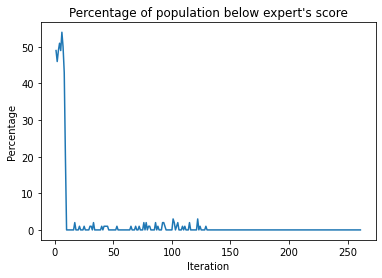

In [23]:
plt.title("Percentage of population below expert's score")
plt.ylabel("Percentage")
plt.xlabel("Iteration")
plt.plot([i for i in range(1, len(expert_better_than_percentages) + 1)], expert_better_than_percentages)
plt.savefig(tmp_dir / 'plot1.png')

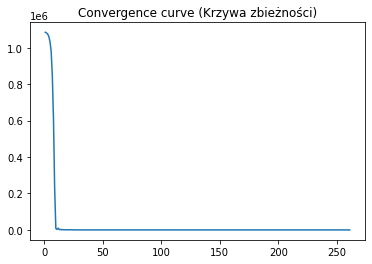

In [10]:
plt.title("Convergence curve (Krzywa zbieżności)")
plot([i for i in range(1, len(expert_scores) + 1)], expert_scores)
plt.savefig(tmp_dir / 'plot2.png')

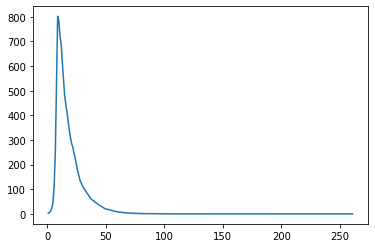

In [11]:
plot([i for i in range(1, len(sigmas) + 1)], sigmas)
plt.savefig(tmp_dir / 'plot3.png')

In [12]:
data = np.array(expert_positions_with_score)

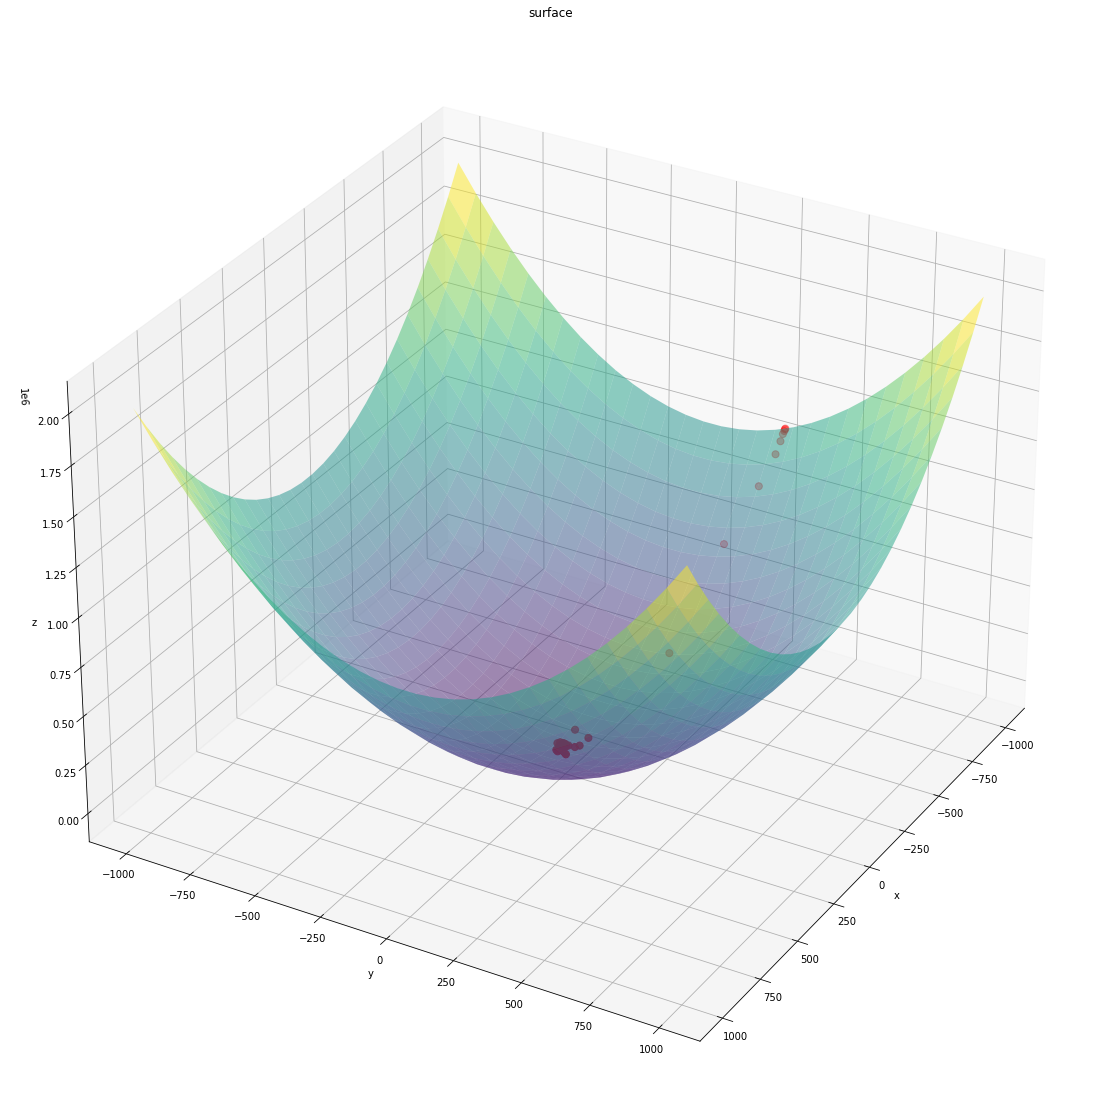

In [24]:
x = np.linspace(-1000, 1000, 30)
y = np.linspace(-1000, 1000, 30)

X, Y = np.meshgrid(x, y)
Z = quadratic1.expression(X, Y)


fig = plt.figure(figsize=(20,20))
# ax = plt.axes(projection='3d')
# ax.contour3D(X, Y, Z, 50, cmap='binary')

ax = plt.axes(projection='3d')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

ax.plot_surface(X, Y, Z, rstride=1, cstride=1,
                cmap='viridis', edgecolor='none', alpha=0.5)
ax.scatter(data[:,0], data[:,1], data[:,2], c='r', s=50)
ax.set_title('surface')

ax.view_init(30, 30)
# fig
fig.savefig(tmp_dir / 'plot4.png')

In [27]:
x = np.linspace(-1000, 1000, 30)
y = np.linspace(-1000, 1000, 30)

X, Y = np.meshgrid(x, y)
Z = quadratic1.expression(X, Y)

iteration = 8
data_pop = np.array(population_positions_with_score[iteration])


fig = go.Figure(data=[go.Surface(z=Z, x=x, y=y, opacity=0.5), 
                      go.Scatter3d(
    x=data[:, 0],
    y=data[:, 1],
    z=data[:, 2],
    mode='markers',
    marker=dict(
#         size=12,
#         color=z,                # set color to an array/list of desired values
        colorscale='Viridis',   # choose a colorscale
#         opacity=0.8
    )),go.Scatter3d(
    x=data_pop[:, 0],
    y=data_pop[:, 1],
    z=data_pop[:, 2],
    mode='markers',
    marker=dict(
#         size=12,
        color='Green',                # set color to an array/list of desired values
        colorscale='Viridis',   # choose a colorscale
#         opacity=0.8
    )
)])
fig.update_layout(title='Quadratic', autosize=True,
#                   width=500, height=500,
                  margin=dict(l=65, r=50, b=65, t=90))
fig.show()